In [158]:
import pandas as pd
import numpy as np
import pybaseball as pb
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [159]:
doval = pb.statcast_pitcher('2021-04-01', '2021-10-03', '666808')

Gathering Player Data


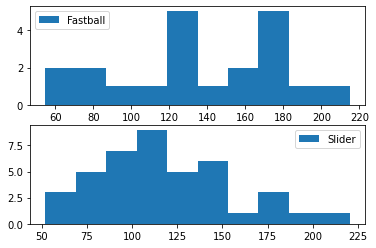

In [160]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(x='hc_x', label='Fastball', data=doval.loc[doval['pitch_type']=='FF'])
ax2.hist(x='hc_x', label='Slider', data=doval.loc[doval['pitch_type']=='SL'])
ax1.legend()
ax2.legend()

In [161]:
doval.loc[doval['pitch_type']=='SL']['hc_x'].mean()

117.69902439024392

In [162]:
suter = pb.statcast_pitcher('2021-04-01', '2021-10-03', '608718')

Gathering Player Data


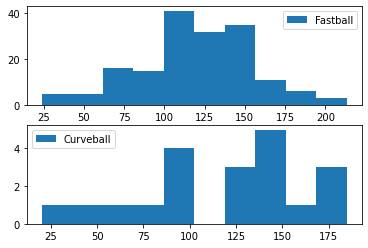

In [163]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(x='hc_x', label='Fastball', data=suter.loc[suter['pitch_type']=='FF'])
ax2.hist(x='hc_x', label='Curveball', data=suter.loc[suter['pitch_type']=='CU'])
ax1.legend()
ax2.legend()

In [164]:
sample_data = pb.statcast('2021-04-01', '2021-10-03')

This is a large query, it may take a moment to complete
Completed sub-query from 2021-04-01 to 2021-04-06
Completed sub-query from 2021-04-07 to 2021-04-12
Completed sub-query from 2021-04-13 to 2021-04-18
Completed sub-query from 2021-04-19 to 2021-04-24
Completed sub-query from 2021-04-25 to 2021-04-30
Completed sub-query from 2021-05-01 to 2021-05-06
Completed sub-query from 2021-05-07 to 2021-05-12
Completed sub-query from 2021-05-13 to 2021-05-18
Completed sub-query from 2021-05-19 to 2021-05-24
Completed sub-query from 2021-05-25 to 2021-05-30
Completed sub-query from 2021-05-31 to 2021-06-05
Completed sub-query from 2021-06-06 to 2021-06-11
Completed sub-query from 2021-06-12 to 2021-06-17
Completed sub-query from 2021-06-18 to 2021-06-23
Completed sub-query from 2021-06-24 to 2021-06-29
Completed sub-query from 2021-06-30 to 2021-07-05
Completed sub-query from 2021-07-06 to 2021-07-11
Completed sub-query from 2021-07-12 to 2021-07-17
Completed sub-query from 2021-07-18 to 2021-

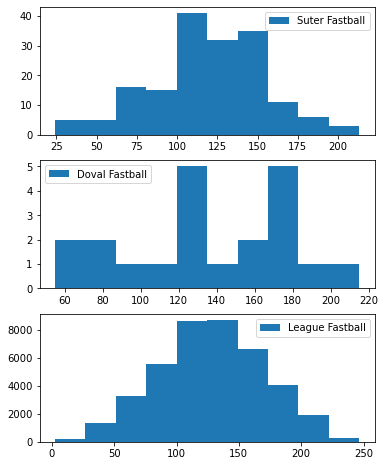

In [165]:
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(6, 8))
ax1.hist(x='hc_x', label='Suter Fastball', data=suter.loc[suter['pitch_type']=='FF'])
ax2.hist(x='hc_x', label='Doval Fastball', data=doval.loc[doval['pitch_type']=='FF'])
ax3.hist(x='hc_x', label='League Fastball', data=sample_data.loc[sample_data['pitch_type']=='FF'])
ax1.legend()
ax2.legend()
ax3.legend()


In [166]:
sample_data.loc[sample_data['pitch_type']=='FF']['hc_x'].mean()
doval.loc[doval['pitch_type']=='FF']['hc_x'].mean()

137.0233333333333

In [167]:
suter.loc[suter['pitch_type']=='FF']['hc_x'].mean()

119.4891715976331

In [168]:
fbs = sample_data.loc[sample_data['pitch_type']=='FF']
fbs.loc[(fbs['release_speed'] > 87) & (fbs['release_speed'] < 88)]['hc_x'].mean()


122.88647855530473

In [169]:
len(fbs.loc[(fbs['release_speed'] > 87) & (fbs['release_speed'] < 88)]['player_name'].unique())

120

In [170]:
fbs.loc[(fbs['release_speed'] > 98) & (fbs['release_speed'] < 99)]['hc_x'].mean()

128.84097222222218

In [171]:
clase = pb.statcast_pitcher('2021-04-01', '2021-10-03', '661403')

Gathering Player Data


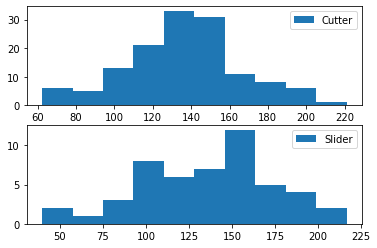

In [172]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(x='hc_x', label='Cutter', data=clase.loc[clase['pitch_type']=='FC'])
ax2.hist(x='hc_x', label='Slider', data=clase.loc[clase['pitch_type']=='SL'])
ax1.legend()
ax2.legend()

In [173]:
clase.loc[clase['pitch_type']=='FC']['hc_x'].mean()

136.34111111111113

In [174]:
clase.loc[clase['pitch_type']=='SL']['hc_x'].mean()

136.2744

In [175]:
sample_data.groupby('stand')['hc_x'].describe()

,count,mean,std,min,25%,50%,75%,max
stand,,,,,,,,
L,48559.0,131.460577,40.212112,7.88,105.42,135.17,156.80,246.71
R,73065.0,121.493580,40.109990,2.01,97.43,117.48,147.53,244.14


In [176]:
sample_data['hit'] = np.where((sample_data['events'].isin(['single', 'double', 'triple'])), 1, 0)
sample_data['hc_y_inv'] = -sample_data['hc_y']
sample_data['hc_y_adj'] = 204.5 - sample_data['hc_y']
sample_data['hc_x_adj'] = sample_data['hc_x'] - 126

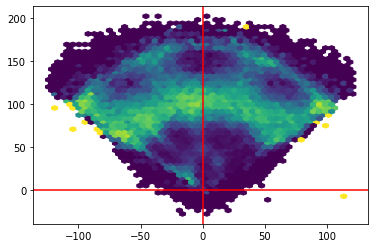

In [177]:
fig, ax = plt.subplots()
ax.hexbin(x='hc_x_adj', y='hc_y_adj', C='hit', gridsize=50, data=sample_data)
plt.axvline(0, color='red')
plt.axhline(0, color='red')

In [178]:
sample_data.loc[sample_data['hit']==1]['hc_y'].max()

210.45

In [179]:
import math
rad = math.pi/4
rotation_mat = np.array([[math.cos(rad), -math.sin(rad)],
                        [math.sin(rad), math.cos(rad)]])
sample_data[['pos_x', 'pos_y']] = sample_data.loc[:, ['hc_x_adj', 'hc_y_adj']].dot(rotation_mat)


In [180]:
radius_squared = sample_data['pos_x'].pow(2) + sample_data['pos_y'].pow(2)
sample_data['R'] = np.sqrt(radius_squared)
sample_data.nlargest(10, 'R')

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,hit,hc_y_inv,hc_y_adj,hc_x_adj,pos_x,pos_y,R
614391,17056,FF,2021-04-26,94.8,1.88,6.28,"Matzek, Tyler",575929.0,554431.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,6.0,Willson Contreras homers (7) on a fly ball to ...,R,R,L,ATL,CHC,X,NaN,fly_ball,0.0,0.0,2021.0,0.34,1.56,0.28,2.44,NaN,622110.0,NaN,1.0,7.0,Top,81.64,4.32,NaN,NaN,518595.0,NaN,NaN,-4.925538,-137.732056,-7.831422,5.387209,31.655108,-10.800372,3.41,1.56,456.0,114.3,24.0,94.8,2495.0,6.4,634402.0,554431.0,518595.0,518692.0,645277.0,663586.0,621020.0,542303.0,628338.0,660670.0,54.07,0.994,1.977,2.0,1.0,0.0,3.0,6.0,64.0,1.0,4-Seam Fastball,8.0,5.0,5.0,8.0,7.0,8.0,7.0,8.0,Standard,Standard,155.0,-0.145,1.587,0,-4.32,200.18,-44.36,110.181379,172.915892,205.036197
438854,3631,FF,2021-06-11,96.1,-1.82,5.82,"Sawamura, Hirokazu",665489.0,617228.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,1.0,Vladimir Guerrero Jr. homers (19) on a line d...,R,R,R,BOS,TOR,X,NaN,line_drive,0.0,2.0,2021.0,-0.75,1.43,-0.53,2.98,NaN,NaN,543760.0,2.0,6.0,Top,90.10,4.40,NaN,NaN,543877.0,NaN,NaN,5.110383,-139.943056,-5.188205,-10.963252,30.144130,-12.356056,3.47,1.59,443.0,111.3,24.0,96.1,2259.0,6.1,633735.0,617228.0,543877.0,666915.0,624414.0,646240.0,503556.0,657077.0,571771.0,592669.0,54.38,0.994,1.965,2.0,1.0,0.0,3.0,6.0,49.0,3.0,4-Seam Fastball,1.0,3.0,3.0,1.0,5.0,1.0,5.0,1.0,Standard,Strategic,214.0,-0.145,1.965,0,-4.40,200.10,-35.90,116.106933,166.877200,203.294909
188548,20142,SL,2021-08-17,86.9,-1.77,5.83,"Márquez, Germán",502054.0,608566.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Tommy Pham homers (13) on a fly ball to left c...,R,R,R,COL,SD,X,NaN,fly_ball,2.0,1.0,2021.0,0.06,0.20,-0.02,2.24,NaN,NaN,NaN,1.0,7.0,Top,34.92,22.88,NaN,NaN,553869.0,NaN,NaN,3.998001,-126.706610,-2.977875,0.064993,18.588587,-29.700360,3.41,1.56,486.0,107.9,28.0,86.4,2388.0,5.2,632851.0,608566.0,553869.0,543068.0,663898.0,641857.0,596115.0,656582.0,656541.0,453568.0,55.25,0.971,1.939,2.0,1.0,0.0,3.0,6.0,53.0,4.0,Slider,4.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,Standard,Standard,192.0,-0.114,0.968,0,-22.88,181.62,-91.08,64.021448,192.828019,203.178224
151743,10267,FF,2021-08-26,94.6,-2.43,5.90,"Kaprielian, James",519317.0,621076.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,6.0,Giancarlo Stanton homers (23) on a fly ball to...,R,R,R,OAK,NYY,X,NaN,fly_ball,3.0,2.0,2021.0,-0.78,1.12,0.28,2.56,NaN,NaN,NaN,1.0,2.0,Top,128.84,2.60,NaN,NaN,669221.0,NaN,NaN,8.779726,-137.397276,-5.489425,-11.880671,31.132671,-16.965514,3.66,1.68,436.0,116.2,21.0,94.1,2135.0,6.1,632749.0,621076.0,669221.0,621566.0,476704.0,656305.0,462101.0,543281.0,516782.0,592192.0,54.36,0.951,1.738,2.0,1.0,0.0,3.0,6.0,8.0,6.0,4-Seam Fastball,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Standard,Standard,223.0,-0.111,0.951,0,-2.60,201.90,2.84,144.773042,140.756676,201.919973
53221,7679,FF,2021-09-20,92.9,-2.48,5.39,"Widener, Taylor",594807.0,642203.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Adam Duvall homers (37) on a fly ball to left ...,R,R,R,ARI,ATL,X,NaN,fly_

In [181]:
help(math.cos)

Help on built-in function cos in module math:

cos(x, /)
    Return the cosine of x (measured in radians).



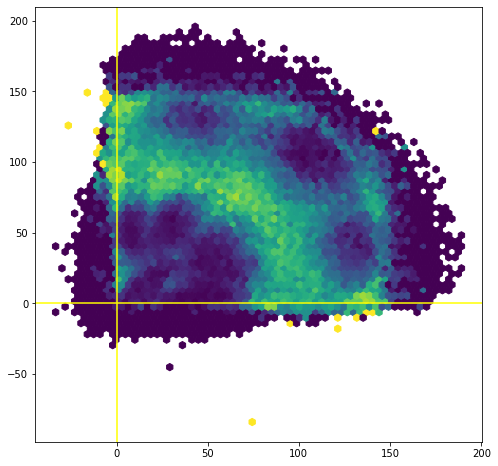

In [213]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hexbin(x='pos_x', y='pos_y', C='hit', gridsize=64, data=sample_data)
plt.axvline(0, color='yellow')
plt.axhline(0, color='yellow')

In [183]:
sample_data['radians'] = np.arctan(sample_data['pos_y']/sample_data['pos_x'])

In [184]:
sample_data['degrees'] = sample_data['radians'] * (180/math.pi)

In [185]:
sample_data.groupby('stand')['degrees'].mean()

stand
L    36.192483
R    46.809241
Name: degrees, dtype: float64

In [189]:
sample_data.loc[sample_data['pitcher'] == 666808].groupby(['pitch_type', 'stand'])['degrees'].mean()

pitch_type  stand
FF          L        44.878182
            R        32.487245
SL          L        47.758000
            R        55.229094
Name: degrees, dtype: float64

In [198]:
sample_data.loc[sample_data['pitcher'] == 661403].groupby(['pitch_type', 'stand'])['degrees'].mean()

pitch_type  stand
FC          L        35.027862
            R        36.844046
FF          L        30.787875
            R        30.085764
SL          L        24.878140
            R        43.773672
Name: degrees, dtype: float64

In [211]:
sample_data.loc[(sample_data['pitch_type'] == 'SL') & (sample_data['release_speed'] >86)].groupby(['pitch_type', 'stand'])['degrees', 'R'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


degrees          R
pitch_type stand                      
SL         L      31.488396  89.573648
           R      49.632972  86.907699

In [212]:
sample_data.groupby(['pitch_type', 'stand'])['degrees', 'R'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


degrees           R
pitch_type stand                       
CH         L      32.627372   85.732301
           R      52.492519   86.058117
CS         L      32.218031   82.879126
           R      60.518269   92.573080
CU         L      32.326596   90.062613
           R      53.201709   88.679584
EP         L      47.744852   69.211376
           R      58.668015   81.258677
FA         L      35.643562  101.463471
           R      49.566062  102.461042
FC         L      33.941451   87.416586
           R      47.550917   91.631578
FF         L      39.290890   97.315297
           R      40.948600   98.301925
FS         L      33.057371   82.665362
           R      54.175544   81.888678
KC         L      33.380375   88.851426
           R      53.496347   87.045896
KN         L      50.693125  122.116637
           R      34.720130  126.111547
SC         L       6.579253   63.257171
SI         L      40.058013   87.250274
           R      46.580622   83.160598
SL         L      32.171327   91.182441
           R      49.904221   89.649734